<a href="https://colab.research.google.com/github/yesiltepe-hidir/NVAE/blob/master/NRAE_XPDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/yesiltepe-hidir/NVAE.git
!pip install tensorboardX

In [ ]:
!rm -rf church_outdoor_train_lmdb.zip church_outdoor_val_lmdab.zip church_outdoor_train_lmdb

# LSUN Church Dataset
!git clone https://github.com/fyu/lsun.git
!python3 lsun/download.py -c church_outdoor

# Unzip 
!unzip church_outdoor_train_lmdb.zip
!unzip church_outdoor_val_lmdb.zip

# Remove
!rm -rf lsun
!rm -rf church_outdoor_train_lmdb.zip
!rm -rf church_outdoor_val_lmdb.zip

In [1]:
%cd NVAE 

/content/NVAE


In [2]:
!python3 train.py --dataset mnist --epochs 4 --root /content/NVAE  --data /content/NVAE --save /eval- --batch_size 200
# !python3 train.py --dataset lsun_church_64 --epochs 5  --root /content/NVAE  --data /content/NVAE --save /eval- --batch_size 32

Experiment dir : /content/NVAE/eval-
starting in debug mode
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
MULT:  1.0
len log norm: 128
len bn: 92
07/23 10:03:03 PM (Elapsed: 00:00:02) args = Namespace(ada_groups=False, arch_instance='res_mbconv', batch_size=200, cont_training=False, data='/content/NVAE', dataset='mnist', distributed=True, embedding_weight=0.0001, epochs=4, fast_adamax=False, global_rank=0, kl_anneal_portion=0.3, kl_const_coeff=0.0001, kl_const_portion=0.0001, l2_weight=10, learning_rate=0.01, learning_rate_min=0.0001, local_rank=0, master_address='127.0.0.1', min_gro

In [ ]:
# Import libraries
import argparse
import torch
import torch.nn as nn
import numpy as np
import os

import torch.distributed as dist
from torch.multiprocessing import Process
from torch.cuda.amp import autocast, GradScaler

from model import AutoEncoder
from thirdparty.adamax import Adamax
import utils
import datasets
from torchvision import transforms

from fid.fid_score import compute_statistics_of_generator, load_statistics, calculate_frechet_distance
from fid.inception import InceptionV3

import matplotlib.pyplot as plt

In [ ]:
# from google.colab import files
# Get args
PATH = 'eval-/checkpoint.pt'
# files.download(PATH)
checkpoint = torch.load(PATH)
args = checkpoint['args']
checkpoint.keys()

dict_keys(['epoch', 'state_dict', 'optimizer', 'global_step', 'args', 'arch_instance', 'scheduler', 'logits', 'losses', 'grad_scalar'])

In [ ]:
# Create Model
writer = utils.Writer(args.global_rank, args.save)
arch_instance = utils.get_arch_cells(args.arch_instance)
model = AutoEncoder(args, writer, arch_instance)
model = model.cuda()

# Load Model
model.load_state_dict(checkpoint['state_dict'])

# Initialize
os.environ['MASTER_ADDR'] = args.master_address
os.environ['MASTER_PORT'] = '6020'
torch.cuda.set_device(args.local_rank)
dist.init_process_group(backend='nccl', init_method='env://', rank=0, world_size=args.num_process_per_node)

MULT:  1.0
len log norm: 128
len bn: 92


In [17]:
# logits = model.sample(4, 1)
# len(logits)
logits = checkpoint_nrae['logits']
logits.size()

torch.Size([200, 1, 32, 32])

In [19]:
def visualize(n_samples, model, logits, offset=0, size=(400, 400)):
  output = model.decoder_output(logits[offset:offset + n_samples])
  output_img = output.mean
  output_tiled = utils.tile_image(output_img, int(n_samples ** 0.5))

  transform = transforms.ToPILImage()
  img = transform(output_tiled)
  return img.resize(size)

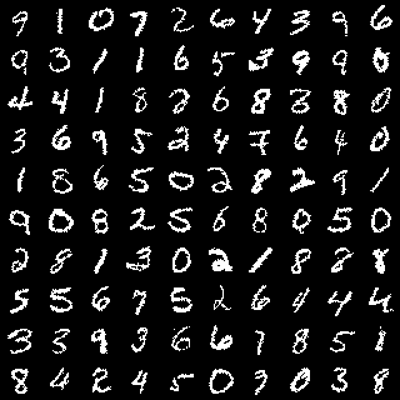

In [29]:
visualize(100, model_nrae, logits)

# NVAE

In [ ]:
%cd ..
!git clone https://github.com/NVlabs/NVAE.git

/content
Cloning into 'NVAE'...
remote: Enumerating objects: 70, done.
remote: Total 70 (delta 0), reused 0 (delta 0), pack-reused 70
Unpacking objects: 100% (70/70), done.


In [ ]:
%cd NRAE

/content/NRAE


In [ ]:
!pip install tensorboardX

In [ ]:
# !python3 train.py --dataset mnist --epochs 1 --root /content/NVAE  --data /content/NVAE --save /eval- --batch_size 200
!python3 train.py --dataset lsun_church_64 --epochs 5  --root /content/NVAE  --data /content/NRAE --save /eval- --batch_size 32

In [ ]:
# Import libraries
import argparse
import torch
import torch.nn as nn
import numpy as np
import os

import torch.distributed as dist
from torch.multiprocessing import Process
from torch.cuda.amp import autocast, GradScaler

from model import AutoEncoder
from thirdparty.adamax import Adamax
import utils
import datasets

from fid.fid_score import compute_statistics_of_generator, load_statistics, calculate_frechet_distance
from fid.inception import InceptionV3

import matplotlib.pyplot as plt

In [ ]:
# Get args
PATH = 'eval-/eval-/checkpoint.pt'
checkpoint = torch.load(PATH)
args = checkpoint['args']

In [ ]:
# Create Model
writer = utils.Writer(args.global_rank, args.save)
arch_instance = utils.get_arch_cells(args.arch_instance)
model = AutoEncoder(args, writer, arch_instance)
model = model.cuda()

len log norm: 128
len bn: 92


In [ ]:
# Load Model
model.load_state_dict(checkpoint['state_dict'])

# Initialize
os.environ['MASTER_ADDR'] = args.master_address
os.environ['MASTER_PORT'] = '6020'
torch.cuda.set_device(args.local_rank)
dist.init_process_group(backend='nccl', init_method='env://', rank=0, world_size=args.num_process_per_node)

In [ ]:
# logits = model.sample(4, 1)
# len(logits)
logits_nvae = checkpoint['logits']
logits_nvae.size()

torch.Size([32, 100, 64, 64])

In [ ]:
losses_nvae = checkpoint['losses']

In [ ]:
# Get args
PATH = '/content/LSUN_NRAE_4.pt'
checkpoint_nrae = torch.load(PATH)
losses_nrae = checkpoint_nrae['losses']

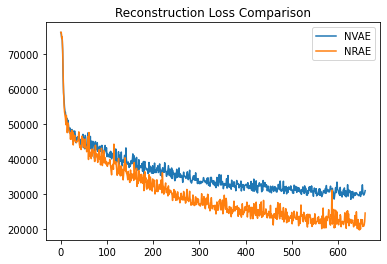

In [ ]:
plt.plot(losses_nvae, label='NVAE')
plt.plot(losses_nrae, label='NRAE')
plt.title('Reconstruction Loss Comparison')
plt.legend();

In [ ]:
logits_nrae = checkpoint_nrae['logits']
logits_nrae.size()

torch.Size([32, 100, 64, 64])

In [ ]:
from torchvision import transforms

def visualize(n_samples, model, logits, offset=0, size=(400, 400)):
  output = model.decoder_output(logits[offset:offset + n_samples])
  output_img = output.sample(1)
  output_tiled = utils.tile_image(output_img, int(n_samples ** 0.5))

  transform = transforms.ToPILImage()
  img = transform(output_tiled)
  return img.resize(size)

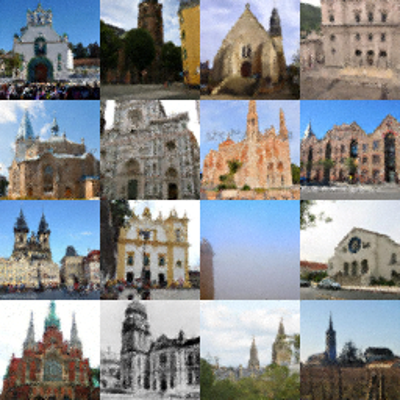

In [ ]:
visualize(16, logits_nvae)

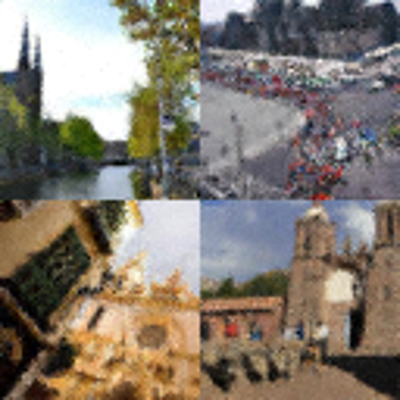

In [ ]:
visualize(4, logits_nvae, 16)

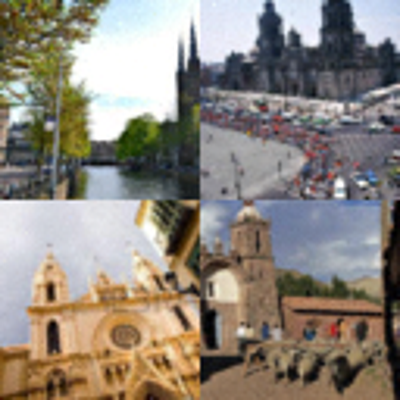

In [ ]:
visualize(4, logits_nrae, 16)

# NRAE with XPDE

In [1]:
%cd NVAE

/content/NVAE


In [19]:
# Import libraries
import argparse
import torch
import torch.nn as nn
import numpy as np
from sklearn import mixture
import os

import torch.distributed as dist
from torch.multiprocessing import Process
from torch.cuda.amp import autocast, GradScaler

from model import AutoEncoder
from thirdparty.adamax import Adamax
import utils
import datasets
from thirdparty.lsun import LSUN
from torchvision import transforms
import torchvision.datasets as dset

from fid.fid_score import compute_statistics_of_generator, load_statistics, calculate_frechet_distance
from fid.inception import InceptionV3
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [4]:
# Get args
PATH = '/content/NVAE/eval-/checkpoint.pt'
checkpoint_nrae = torch.load(PATH)

# Get args
args_rae = checkpoint_nrae['args']

# Create Model
writer = utils.Writer(args_rae.global_rank, args_rae.save)
arch_instance = utils.get_arch_cells(args_rae.arch_instance)
model_nrae = AutoEncoder(args_rae, writer, arch_instance)
model_nrae = model_nrae.cuda()

# Load Model
model_nrae.load_state_dict(checkpoint_nrae['state_dict'])

# Get z0
z0_nrae = checkpoint_nrae['z0']

# Get logits
logits_nrae = checkpoint_nrae['logits']
logits_nrae.size()

MULT:  1.0
len log norm: 128
len bn: 92


torch.Size([200, 1, 32, 32])

In [5]:
# Initialize
os.environ['MASTER_ADDR'] = args_rae.master_address
os.environ['MASTER_PORT'] = '6020'
torch.cuda.set_device(args_rae.local_rank)
dist.init_process_group(backend='nccl', init_method='env://', rank=0, world_size=args_rae.num_process_per_node)

In [6]:
# def _data_transforms_lsun(size):
#     train_transform = transforms.Compose([
#         transforms.Resize(size),
#         transforms.RandomCrop(size),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#     ])

#     valid_transform = transforms.Compose([
#         transforms.Resize(size),
#         transforms.CenterCrop(size),
#         transforms.ToTensor(),
#     ])

#     return train_transform, valid_transform


class Binarize(object):
    """ This class introduces a binarization transformation
    """
    def __call__(self, pic):
        return torch.Tensor(pic.size()).bernoulli_(pic)

    def __repr__(self):
        return self.__class__.__name__ + '()'

def _data_transforms_mnist(args):
    """Get data transforms for cifar10."""
    train_transform = transforms.Compose([
        transforms.Pad(padding=2),
        transforms.ToTensor(),
        Binarize(),
    ])

    valid_transform = transforms.Compose([
        transforms.Pad(padding=2),
        transforms.ToTensor(),
        Binarize(),
    ])

    return train_transform, valid_transform

In [7]:
# from thirdparty.lsun import LSUN
# from torchvision import transforms

# # Preprocess data
# resize = 64
# num_classes = 1
# _, valid_transform = _data_transforms_lsun(resize)
# valid_data = LSUN(root='/content/NRAE', classes=['church_outdoor_val'], transform=valid_transform)

num_classes = 10
train_transform, valid_transform = _data_transforms_mnist(args_rae)
train_data = dset.MNIST(
    root=args_rae.data, train=True, download=False, transform=train_transform)
valid_data = dset.MNIST(
    root=args_rae.data, train=False, download=False, transform=valid_transform)

In [8]:
valid_sampler = None
if args_rae.distributed:
  valid_sampler = torch.utils.data.distributed.DistributedSampler(valid_data)

valid_queue = torch.utils.data.DataLoader(
        valid_data, batch_size=args_rae.batch_size,
        shuffle=(valid_sampler is None),
        sampler=valid_sampler, pin_memory=True, num_workers=1, drop_last=False)

In [9]:
def fit(model, queue, gmm):
  z = []
  with torch.no_grad():
    for x in queue:
      x = x[0].float().cuda()

      # Normalize x between -1, 1       
      s = model.stem(2 * x - 1.0)     
      
      # perform pre-processing         
      for cell in model.pre_process:   
          s = cell(s)                  
                                      
      # run the main encoder tower
      for cell in model.enc_tower:    
        if cell.cell_type != 'combiner_enc':
            s = cell(s)

      idx_dec = 0
      ftr = model.enc0(s)             
      z_ = model.enc_sampler[idx_dec](ftr) 
      z.append(z_)

  
  z = torch.cat(z)
  print('z:', z.shape)
  z = z.view(10000, -1)
  gmm.fit(z.cpu().detach())
  
  return gmm

In [10]:
def sample(model, gmm, num_samples, z0=None):
  scale_ind = 0
  
  z = z0  if z0 is not None else torch.tensor(gmm.sample(num_samples)[0]).view(num_samples, 20, 8, 8).cuda().float()

  idx_dec = 0
  s = model.prior_ftr0.unsqueeze(0)
  batch_size = z.size(0)
  s = s.expand(batch_size, -1, -1, -1)
  for cell in model.dec_tower:
      if cell.cell_type == 'combiner_dec':
          if idx_dec > 0:
              # form prior
              z = model.dec_sampler[idx_dec - 1](s)
              # mu, log_sigma = torch.chunk(param, 2, dim=1)
              # dist = Normal(mu, log_sigma, t)
              # z, _ = dist.sample()

          # 'combiner_dec'
          s = cell(s, z)
          idx_dec += 1
      else:
          s = cell(s)
          if cell.cell_type == 'up_dec':
              scale_ind += 1

  for cell in model.post_process:
      s = cell(s)

  logits = model.image_conditional(s)
  return logits

In [11]:
def visualize(n_samples, model, logits, offset=0, size=(400, 400)):
  output = model.decoder_output(logits[offset:offset + n_samples])
  output_img = output.mean
  output_tiled = utils.tile_image(output_img, int(n_samples ** 0.5))

  transform = transforms.ToPILImage()
  img = transform(output_tiled)
  return img.resize(size)

In [13]:
gmm = mixture.GaussianMixture(
            n_components=10,
            covariance_type="diag",
            max_iter=1000,
            verbose=0,
            tol=1e-3,
        )

In [15]:
gmm = fit(model_nrae, valid_queue, gmm)

z: torch.Size([10000, 20, 8, 8])


In [16]:
l2 = nn.MSELoss()
samples = gmm.sample(200)[0]
samples = torch.tensor(samples)
samples = samples.view(200, 20, 8, 8).cuda()
l2(samples, z0_nrae).item()

0.010101639180196065

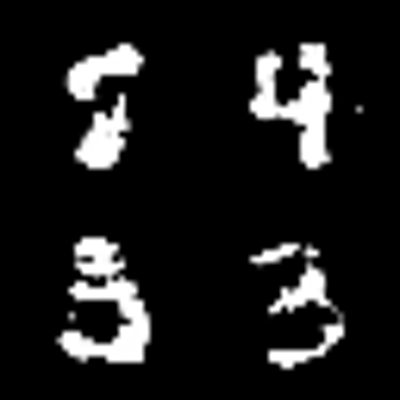

In [14]:
logit = sample(model_nrae, gmm, 100, None)
visualize(4, model_nrae, logit)

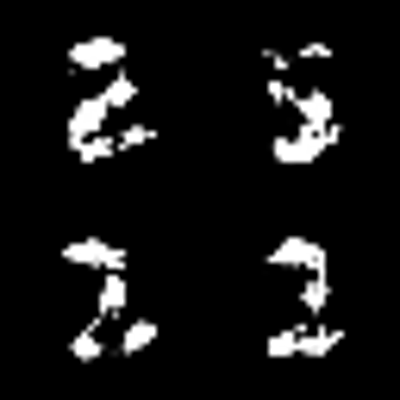

In [20]:
logit = sample(model_nrae, gmm, 100, None)
visualize(4, model_nrae, logit)

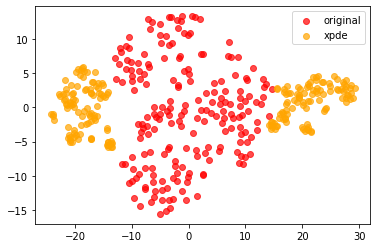

In [21]:
logit_original = checkpoint_nrae['logits'].view(200, -1).cpu().detach()
logit_xpde = logit.reshape(200, -1).cpu().detach()

embeddings_original = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(logit_original)

embeddings_xpde = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(logit_xpde)
plt.scatter(embeddings_original[:, 0], embeddings_original[:, 1], color='red', alpha=0.7, label='original')
plt.scatter(embeddings_xpde[:, 0], embeddings_xpde[:, 1], color='orange', alpha=0.7, label='xpde')
plt.legend()

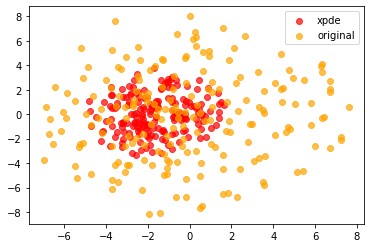

In [23]:
xpde = gmm.sample(200)[0]
latent_xpde = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(xpde)

nrae = z0_nrae.view(200, -1).cpu().detach()
latent_nrae = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(nrae)

plt.scatter(latent_xpde[:, 0], latent_xpde[:, 1], color='red', alpha=0.7, label='xpde')
plt.scatter(latent_nrae[:, 0], latent_nrae[:, 1], color='orange', alpha=0.7, label='original')

plt.legend()

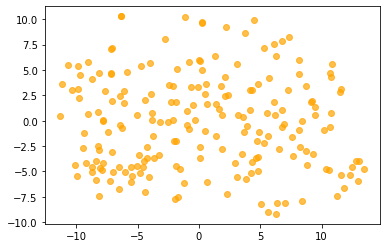

In [42]:
samples = z0_nrae.view(200, -1).cpu().detach()
embeddings = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(samples)
plt.scatter(embeddings[:, 0], embeddings[:, 1], color='orange', alpha=0.7)

# Additional

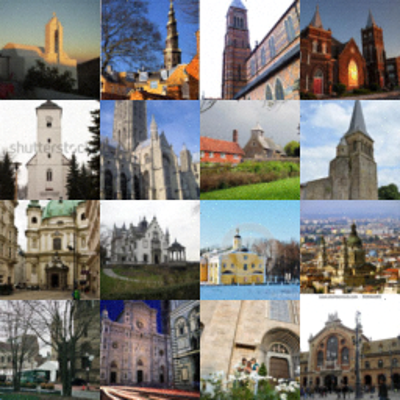

In [ ]:
visualize(16, model_nrae, logits)

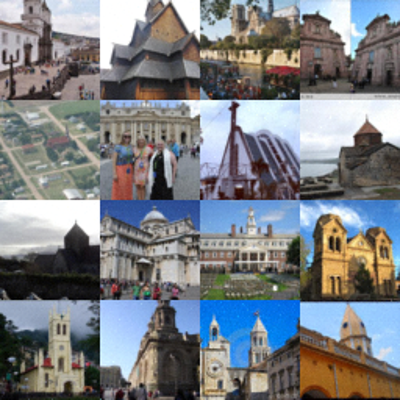

In [ ]:
visualize(16, model_nrae, logits, 16)

In [ ]:
gmm, combiner_cells_enc, combiner_cells_s = sample(x[0].cuda(), model_nrae)
samples = gmm.sample(32)
samples = torch.from_numpy(samples[0])
samples = samples.view(32, 20, 16, 16)
samples = samples.to(device='cuda', dtype=torch.float)
logits = generate(model_nrae, samples)
print('logits:', logits[-1].size())
visualize(16, model_nrae, logits[-1])

s: torch.Size([1, 128, 16, 16]) - z:torch.Size([32, 20, 16, 16])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 64, 32, 32])
torch.Size([32, 32, 64, 64])
torch.Size([32, 32, 64, 64])
torch.Size([32, 32, 64, 64])
logits: torch.Size([32, 32, 64, 64])


RuntimeError: ignored

In [ ]:
samples.size()

torch.Size([32, 20, 16, 16])

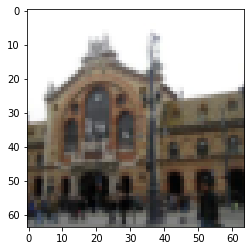

In [ ]:
plt.imshow(x[0][15].permute(1, 2, 0))